<a href="https://colab.research.google.com/github/Myavuzars/MachineLearning/blob/main/Logistic_Regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
from plotnine import *

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

%matplotlib inline

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# data 
df = pd.read_csv(
    "/content/drive/MyDrive/Colab Notebooks/Machine Learning /FashionBig/SKP_fashionBIG.csv")

df.head(5)


,age,income,months_subbed,upgrade
0,22,55.89,14,0
1,32,86.03,57,0
2,38,49.22,37,1
3,14,92.71,51,1
4,33,94.06,37,0


In [11]:
predictors= ["age", "income", "months_subbed"]

In [15]:
X_train,X_test, y_train, y_test =train_test_split(df[predictors], df["upgrade"], test_size=0.2)

zscore =StandardScaler()

zscore.fit(X_train)

Xz_test =zscore.transform(X_test)
Xz_train = zscore.transform(X_train)

In [16]:
lgmodel= LogisticRegression()

In [18]:
lgmodel.fit(Xz_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
predictedVals= lgmodel.predict(Xz_test)

In [20]:
accuracy_score(y_test, predictedVals)

0.645

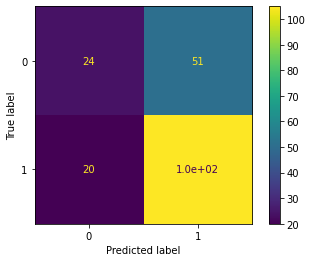

In [21]:
plot_confusion_matrix(lgmodel, Xz_test, y_test)

In [ ]:
# Logisic Regression with Cross Validation

In [26]:
#KFold
X= df[["age", "income", "months_subbed"]]
y= df["upgrade"]

#create K-fold object
kf= KFold(n_splits=5)

#create emty list to store accuracy for each fold
acc=[]

In [30]:
#Use a for loop to loop through each fold and train a model, then add the accuracy to acc

for train_indices, test_indices in kf.split(x):
  X_train= X.iloc[train_indices]
  X_test = X.iloc[test_indices]
  y_train = y[train_indices]
  y_test = y[test_indices]

  #z score
  z = StandardScaler()
  X_train = z.fit_transform(X_train)
  X_test =  z.transform(X_test)

  #model
  model= lgmodel.fit(X_train,y_train)

  #accuracy
  acc.append(accuracy_score(y_test, model.predict(X_test)))


print(acc)
np.mean(acc)



[0.58, 0.605, 0.54, 0.565, 0.645]


0.587